# ***JOB DESCRIPTION BASED RESUME MATCHER USING SENTIMENT ANALYSIS, TEXT SUMMARIZATION, KEYWORD EXTRACTION***



---



---


# 1. IMPORT LIBRARIES


---



---





> In this part, we will import all required packages and libraries which we will be using for further computation.



In [9]:
import numpy as nmp 
import pandas as pnd 
import nltk
import matplotlib.pyplot as pl0t
import seaborn as sbns
import re, os, string
import spacy
import warnings
warnings.filterwarnings("ignore")

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sian
from pprint import PrettyPrinter
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In the above code we are importing numpy,pandas,nltk,matplotlib.pyplot,seaborn,spacy,warnings,vander_lexicon,stopwords,punkt and from nltk we are importing word_tokenize, stopwords, porterstemmer,tweettokenizer,sentimentIntensityAnalyzer,prettyprinter and Tfidvectorizer from python library.



---



---


# 2. READ AND PRE-PROCESS DATA


---



---





> In this part, we read the job description dataset using pandas. We then remove unwanted rows and columns. We remove the empty filled rows.



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the above code we are mounting the google drive for copy the path of dataset.

In [11]:
job_dataset = pnd.read_csv('/content/drive/MyDrive/Colab Notebooks/monster_com-job_sample.csv')
job_dataset.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In the above part we are reading the "jobdescription.csv" file by "pandas" pnd variable by copying the path of dataset from google drive which we had uploaded in the previous step. 

In [12]:
job_data = job_dataset[['job_description','uniq_id']].copy()

job_data = job_data.dropna()

#Lower-case all descriptions
job_data.title = job_data.job_description.str.lower()

#Remove handlers
job_data.title = job_data.job_description.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
job_data.desc = job_data.job_description.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
job_data.desc = job_data.job_description.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
job_data.desc = job_data.job_description.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
job_data.desc = job_data.job_description.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#Remove Time From Timestamp
#job_data.timestamp = pd.to_datetime(job_data.timestamp).dt.date

Here we are dropping or removing the special characters,single characters, single space, multiple spaces and handlers etc from the job description dataset as a part of cleaning or preprocessing. 

In [13]:
job_dataset.drop(['country', 'country_code','date_added','has_expired','job_board','job_type','location','organization','page_url','sector'], axis=1)

,job_description,job_title,salary,uniq_id
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,NaN,11d599f229a80023d2f40e7c52cd941e
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,NaN,e4cbb126dabf22159aff90223243ff2a
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,NaN,839106b353877fa3d896ffb9c1fe01c0
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,NaN,58435fcab804439efdcaa7ecca0fd783
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,NaN,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,"120,000.00 - 160,000.00 $ /yearbonus",a80bc8cc3a90c17eef418963803bc640
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,"45,000.00 - 60,000.00 $ /year",419a3714be2b30a10f628de207d041de
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,NaN,5a590350b73b2cec46b05750a208e345
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,25.00 - 28.00 $ /hour,40161cf61c283af9dc2b0a62947a5f1b


Here we are dropping some extra coulumns from job description dataset such as "country","country_code","date_expired","job_board","job_type".

In [14]:
job_dataset.dropna(subset=['job_description'], inplace=True)

Here we are dropping the null values of "job description" column, which is a part of data preprocessing.



---



---


# 3. SENTIMENT ANALYSIS


---



---





> Here we perform the sentiment analysis on the above job descriptions. We do the lexicon based sentiment analysis , not the machine learning based sentiment analysis as the available dataset does not contain any pre trained data. We use the VaderSentiment for the current task. Also, we use the textblob to do the above task.


> A set of words or phrases and the sentiment scores they correspond with make up VaderSentiment's vocabulary. The scores range from -1 to 1, with a score of 1 representing a strongly favorable feeling and a score of 0 representing a neutral sentiment. Also, the lexicon contains guidelines for dealing with negations, intensifiers, and other linguistic elements that can influence the tone of a document.





In [15]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 11.4 MB/s eta 0:00:00


In the above step we are installing vadersentimentfrom the python library.

In [16]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Sent_Analyser = SentimentIntensityAnalyzer()

In the above block of code we are importing SentimentInyensityAnalyzer from vederSentiment and defining the function SentimentIntensityAnalyzer() for the variable Snet_Analyser.

In [17]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = Sent_Analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

Here we are predicting the score for a particular job description sentence by defining polarity_scores in the function.

In [18]:
job_dataset["sentiment"] = job_dataset["job_description"].apply(lambda review: Sent_Analyser.polarity_scores(review))

job_dataset.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,sentiment
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co..."
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co..."
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co..."
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co..."


Here are diplaying the sentiment analysis that we had performed for the job description dataset which we had uploaded in  the above step.

In [19]:
from textblob import TextBlob

Here we are importing the textblob  from Textblob.

In [20]:
for text in job_dataset["job_description"]:
  if(TextBlob(text).sentiment.polarity>0):
    job_dataset["sentiment_class"]="positive"
  elif(TextBlob(text).sentiment.polarity<0):
    job_dataset["sentiment_class"]="negative"
  else:
    job_dataset["sentiment_class"]="neutral"


Here we are predicting the sentiment polarity for the particular "job description" for the data in the job description dataset.eg, {"positive',"Negative","Neutral"}.

In [21]:
job_dataset.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,sentiment,sentiment_class
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"{'neg': 0.009, 'neu': 0.822, 'pos': 0.169, 'co...",positive
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",positive
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"{'neg': 0.004, 'neu': 0.857, 'pos': 0.139, 'co...",positive
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"{'neg': 0.024, 'neu': 0.811, 'pos': 0.164, 'co...",positive
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"{'neg': 0.011, 'neu': 0.875, 'pos': 0.115, 'co...",positive


Here we are printing the Info about the dataset after performing the sentiment analysis.

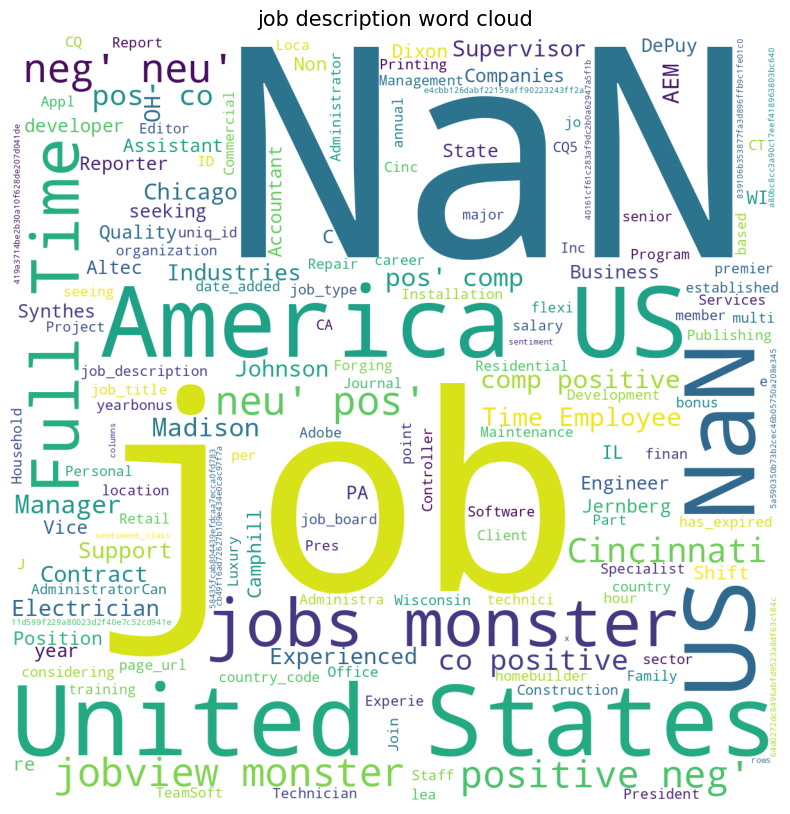

In [22]:
from wordcloud import WordCloud
positive = job_dataset[job_dataset['sentiment']==1]

pl0t.rcParams['figure.figsize']=(10,10)
pl0t.style.use('fast')


wc=WordCloud(background_color='white',width=1200,height=1200).generate(str(job_dataset))
pl0t.title('job description word cloud',fontsize=15)
pl0t.imshow(wc)
pl0t.axis('off')
pl0t.show()

Here we are displaying the Visualization of sentiment analysis that we had performed in the above step.

In [23]:
# total number of positive and negative sentiments
l = len(job_dataset[job_dataset['sentiment_class'] == 'negative'])
print(f"negative sentences= {l} ")

m = len(job_dataset[job_dataset['sentiment_class'] == 'positive'])
print(f" positive sentences= {m}")

m = len(job_dataset[job_dataset['sentiment_class'] == 'neutral'])
print(f" neutral sentences= {m}")

negative sentences= 0 
 positive sentences= 22000
 neutral sentences= 0


Here we are predicting the "positive sentences","negative sentences" and "neutral sentences" that are present in the dataset.

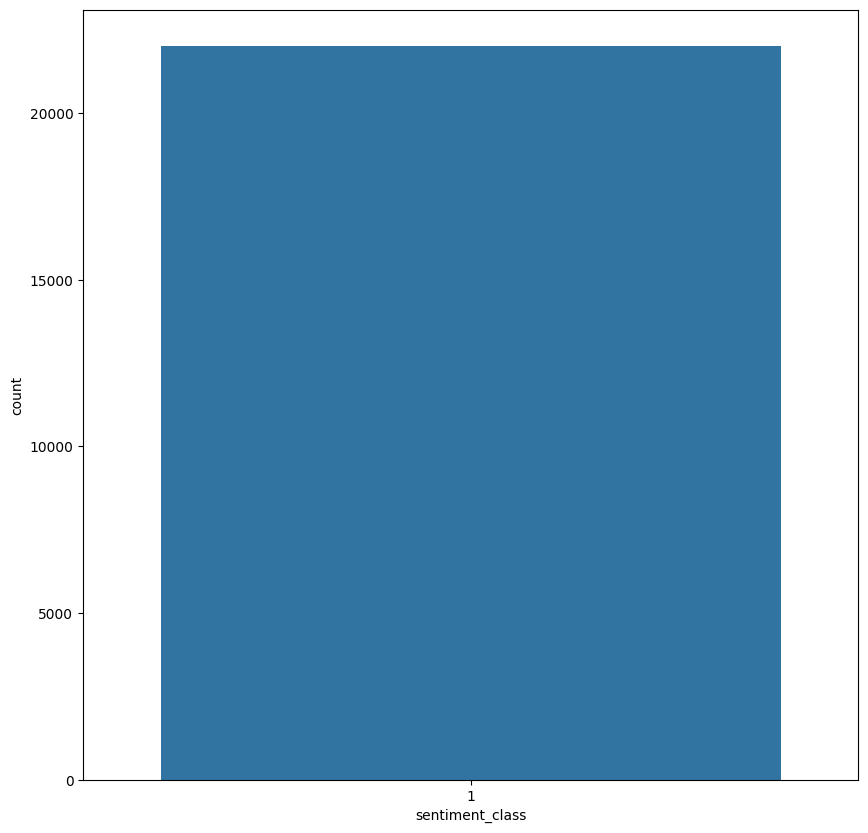

In [24]:
job_dataset['sentiment_class'] = job_dataset['sentiment_class'].map({'positive':1,'negative':-1,'neutral':0},na_action=None)
count = sbns.countplot(data=job_dataset,x='sentiment_class',order=job_dataset['sentiment_class'].value_counts().index)
pl0t.show()

Above graph depicts the Graphical visualzation of "positive sentences" that we had predicted for the dataset. 



---



---


# 4. TEXT SUMMARIZATION


---



---





> In this part, we do the text summarization on the job description dataset. For every job description form the dataset, we extract the brief summary and add it to the dataframe. We create a spacy pipeline and define a summary function.


> Text summarization is a natural language processing (NLP) technique that includes condensing a text while keeping the key points. Text summary aims to provide a condensed version of a text that captures the key ideas and is simpler to read and comprehend.





In [25]:
! pip install pytextrank
import pytextrank #ranking text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In the above code we are installing the pytextrank from the python library.

In [26]:

pp = PrettyPrinter()

Here we are defining prettyprinter() function for pp variable.

In [27]:
job_dataset.info() # infor about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
 14  sentiment        22000 non-null  object
 15  sentiment_class  22000 non-null  int64 
dtypes: int64(1), object(15)
memory usage: 2.7+ MB


Here we are printing the Information about the Job description about the Job dataset.

In [28]:
# Create spaCy pipeline and add textrank to it
import spacy.cli

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Here we are importing the spacy.cli library and downloading "en_core_web_lg" &"en_core_web_lg" corpus data from python library.

In [29]:
def summary_for_article(num,prin=False):
    
    sum = "" # collecting the summary from the generator
    document = nlp(job_dataset.job_description[num]) #apply the pipeline
    
    for i in document._.textrank.summary(limit_phrases=10, limit_sentences=1): #get the summary
        sum+=str(i)
        
    phrases_n_ranks = [ (phrase.chunks[0], phrase.rank) for phrase in document._.phrases] # get important phrases
    
    if prin: 
        print(job_dataset.job_description[num])
        print("\n_______ to ______\n")
        print(sum)
      
        
    return sum

Here we are assigning the ranks for each and every row present in job description dataset after performing the sentiment analysis.

In [30]:
for i in range(0,100):
    print("\n....",i,"")
    summary_for_article(i,True);
    job_dataset["summary"]=summary_for_article(i,True)


.... 0 
TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:• Call tracking software• Phone based technical support• Problem documentation and communication• Remote Desktop Management Tools• Respond to customer requests• General understanding of LANDesk• Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?• TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!• TeamSoft has been in business since 1996• TeamSoft's owners are local IT professionals 

Here we are printing Text Summary of Job description Dataset as a part of Text Summarization.



---



---


# 5. KEYWORD EXTRACTION FROM RESUME DATASET


---



---





> In this part, we extract the keywords from the resume dataset which is required for the other part of our project. We first read and pre-process our data and then apply different pre-processing functions on the data. We also use TfIdfVectorizer and extract the top keywords from the resume description and then add it to the dataframe.Keyword extraction involves locating the most crucial words or phrases in a text. To help with tasks like document categorization, topic modeling, and information retrieval, keyword extraction aims to identify the major subjects or themes in a document or corpus.



In [31]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stop_words = f.readlines()
        stopwords_set = set(m.strip() for m in stop_words)
        return list(frozenset(stopwords_set))

Here we are removing the stopwords for "resume.csv" dataset which is used as the process of extracting the keywords from the given sample resumes.

In [32]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

Here we are performing the pre-processing for "Resume.csv" dataset by adding the punctuation as well as converting the text to lower and adding the punctuation to the text present in dataset.

In [33]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

Here we are intializing the features  and functions that are required for extraction of keywords from "resume.csv" dataset.

In [34]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

Here we are extracting the keywords from "Resume.csv" dataset by initializing  Vectorizer funtion to tf_idf_vector variable.

In [35]:
# Constants
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = "/content/drive/MyDrive/Colab Notebooks/stopwords.txt"
Resume_PATH = "/content/drive/MyDrive/Colab Notebooks/Resume.csv"

Assigning path to each and every and variable such as "Resume_Path"  and " Stopword_Path". 

In [36]:
data = pnd.read_csv(Resume_PATH)
data.drop(["Resume_html"],axis=1)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


Here we are performing some data mining process such as Cleaning the text of Resume_html for "Resume.csv" Dataset by dropping the data of "Resume_htmL" as a part of cleaned,labelled,punctuated text.

In [37]:
data.dropna(subset=['Resume_str'], inplace=True)

In [38]:
data['Resume_str'] = data['Resume_str'].apply(clean_text)
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,hr administratormarketing associate hr admini...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,hr specialist us hr operations summary versat...,"<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,hr director summary over 20 years experience ...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,hr specialist summary dedicated driven and dy...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,hr manager skill highlights hr skills hr depa...,"<div class=""fontsize fontface vmargins hmargin...",HR


Here we are performing some data mining process such as Cleaning the text of Resume_str for "Resume.csv" Dataset by dropping the data of "Resume_str" as a part of cleaned,labelled,punctuated text.

In [39]:
corpora = data['Resume_str'].to_list()

Here we are transforming the text of "Resume_str" column to list format. 

In [40]:
#load a set of stop words
stopwords=get_stopwords_list(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with stopwords
vector = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vector.fit_transform(corpora[10::])

# Storing vocab
ftr_names = vector.get_feature_names_out()

Finally we are removing stopwords and null values present in the text of 'Resume.csv" dataset by assigning "stopwords.txt" path to TfidVrctorizer function.

In [41]:
rslt = []
for docment in corpora[0:10]:
    KW_dataset = {}
    KW_dataset['Resume_str'] = docment
    KW_dataset['top_keywords'] = get_keywords(vector, ftr_names, docment)
    rslt.append(KW_dataset)
    
output = pnd.DataFrame(rslt)
output

,Resume_str,top_keywords
0,hr administratormarketing associate hr admini...,"[marketing, dec, medical, relations, customer,..."
1,hr specialist us hr operations summary versat...,"[marketing, hr, sharepoint, materials, brochur..."
2,hr director summary over 20 years experience ...,"[hris, friends, hr, kansas, adjutant, topeka, ..."
3,hr specialist summary dedicated driven and dy...,"[call, 10key, touch, customer, hr, comments, w..."
4,hr manager skill highlights hr skills hr depa...,"[hr, employee, human, benefits, jan, compensat..."
5,hr generalist summary dedicated and focused a...,"[nonimmigrant, uscis, petitions, 112008, perfo..."
6,hr manager summary human resources manager ex...,"[hr, training, staff, tesol, development, huma..."
7,hr manager professional summary senior hr pro...,"[employee, benefits, human, employees, resourc..."
8,hr specialist summary possess 15 years of exp...,"[hr, statewide, salary, recruitment, pay, comp..."
9,hr clerk summary translates business vision i...,"[hr, shrm, employee, compensation, administrat..."


Here we are displaying the "Keywords" for each and every resume present in the "resume.csv" dataset  after  cleaning the text of "Resume_str" and "Resume_html" columns.



---



---
# End of Project Increment1


---



---

